In [210]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [211]:
dtype_dict = {
    'State': 'string',
    'ParentFederation': 'string',
    'MeetState': 'string',
    'Bench4kg': 'float'
}

In [212]:
# Define a converter function that converts "Yes" to True and empty values to False
def yes_no_to_bool(value):
    if value == 'Yes':
        return True
    else:
        # Treats anything not "Yes" (including empty values) as False
        return False

In [213]:
df = pd. read_csv('data/openpowerlifting-2024-02-03/openpowerlifting-2024-02-03-a32a2f7d.csv', dtype=dtype_dict, converters= {'Tested': yes_no_to_bool})
# df.head()

In [214]:
# df.columns

In [215]:
filtered_df = df[df['Federation'] == 'AusPL']

a list of the meets held by AusPL

In [216]:
filtered_df['MeetName'].unique()

array(['Strength Quest III', 'Drug Tested Nationals',
       'Deep North Powerlifting Challenge', 'Open',
       'Last Chance Qualifier', 'NSW State Championships',
       'Gold Coast Cup', 'Lift3 Winter Cup', 'ZeroW Christmas Cup',
       'NSW States', 'Spring Classic', 'Strength HQ Christmas Cup Open',
       'Open Anzac International', 'End Of Year Send Drug Tested',
       'Tested Nationals', 'Sydney Competition',
       'Champions of Geelong Open', 'Northern Classic Tested',
       'Open National Championships', 'NSW State Titles',
       'Drug Tested Anzac International', 'National Qualifier',
       'Christmas Classic', 'Townsville Cup Drug Tested',
       'Strength Quest II', 'Victorian State Titles',
       'Deep North Deadlift Derby', 'Drug Tested National Championships',
       'WA Classic Drug Tested Raw Championships',
       "Ben's Army Services Tribute", 'VIC State Titles',
       'Strength HQ Nationals Qualifier', 'QLD State Championships',
       'StrengthHQ Christmas 

In [217]:
filtered_df['Date'] = pd.to_datetime(filtered_df['Date'])
filtered_df['Year'] = filtered_df['Date'].dt.year

/tmp/ipykernel_32120/1147595182.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Date'] = pd.to_datetime(filtered_df['Date'])
/tmp/ipykernel_32120/1147595182.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Year'] = filtered_df['Date'].dt.year


In [218]:
yearly_meet_counts = filtered_df.groupby('Year')['MeetName'].nunique()
yearly_meet_counts.head()

Year
2015    5
2018    4
2019    4
2020    5
2021    8
Name: MeetName, dtype: int64

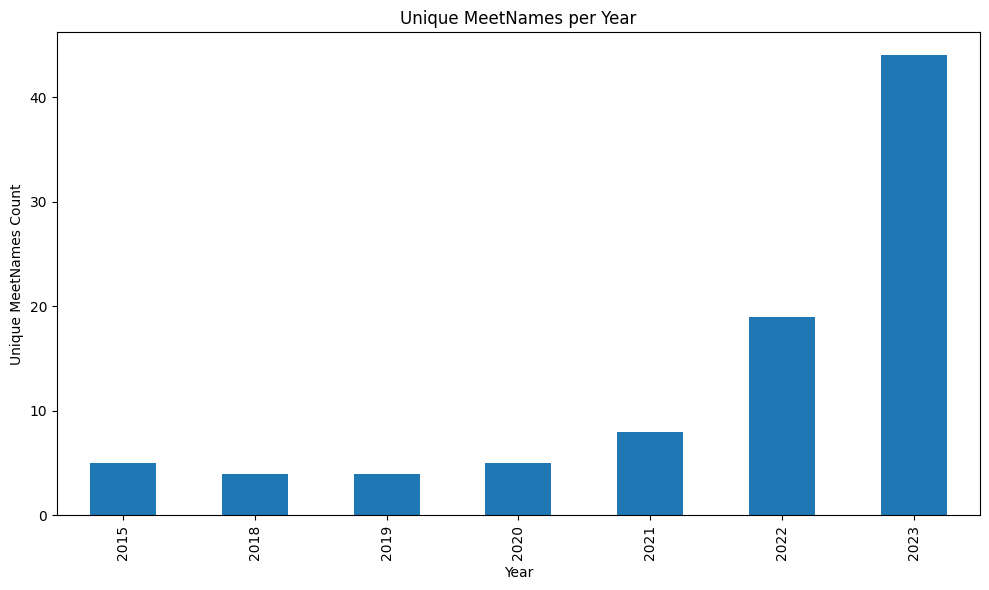

In [219]:
yearly_meet_counts.plot(kind='bar', figsize=(10, 6)) # You can adjust the figure size as needed

plt.title('Unique MeetNames per Year')
plt.xlabel('Year')
plt.ylabel('Unique MeetNames Count')
plt.xticks(rotation=90) # Rotate labels to make them readable
plt.tight_layout() # Adjusts subplot params so that the subplot(s) fits into the figure area

plt.show()

The number of Meets per year has been increasing. A big dip in COVID but has rebounded. But is the number of meets a good representation of the growth of the sport? Useful but incomplete

How many lifters have competed in AusPL meets each year?

In [220]:
yearly_lifter_counts = filtered_df.groupby('Year')['Name'].count()
yearly_lifter_counts.head()

Year
2015    186
2018     61
2019    105
2020    141
2021    337
Name: Name, dtype: int64

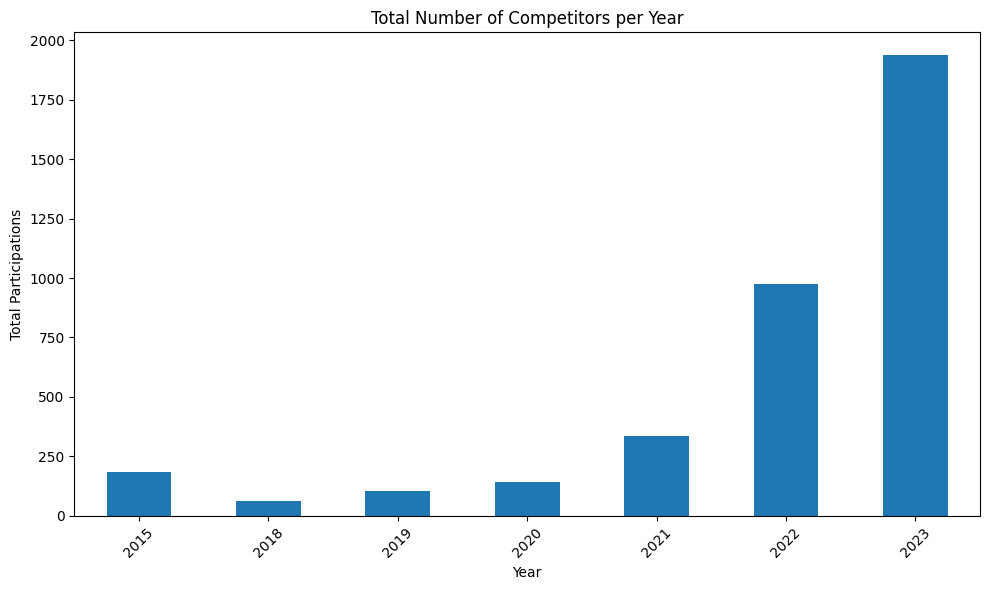

In [221]:
yearly_lifter_counts.plot(kind='bar', figsize=(10, 6))

plt.title('Total Number of Competitors per Year')
plt.xlabel('Year')
plt.ylabel('Total Participations')
plt.xticks(rotation=45)  # Rotate x-axis labels to make them readable
plt.yticks(rotation=0)  # Ensure y-axis labels are vertical
plt.tight_layout()  # Adjust subplot params so that the subplot(s) fits into the figure area

plt.show()

number of unique lifters per year

In [222]:
lifters_per_year = filtered_df.groupby('Year')['Name'].nunique()
lifters_per_year.head()

Year
2015    131
2018     52
2019     61
2020    129
2021    276
Name: Name, dtype: int64

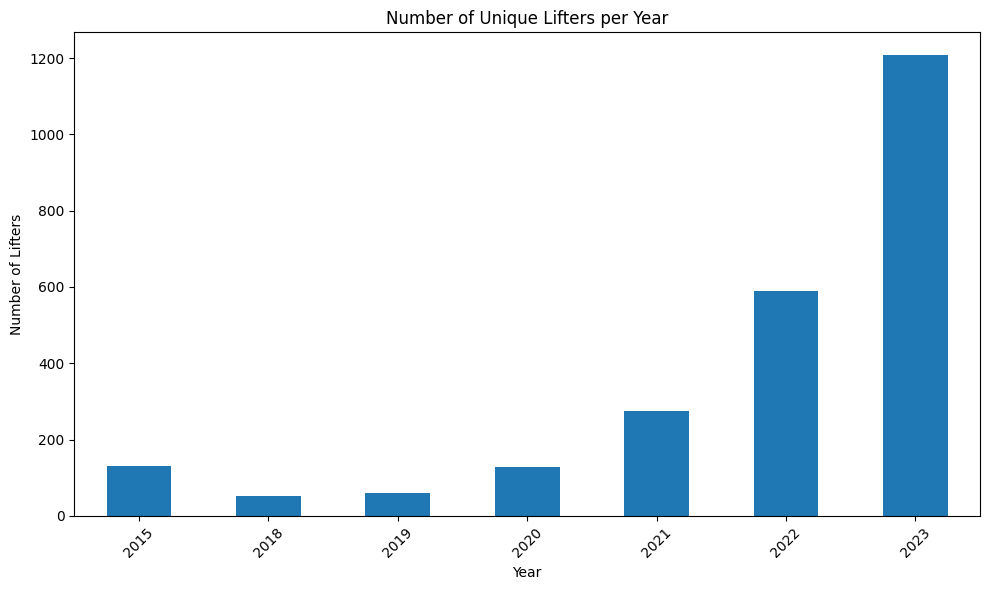

In [223]:
lifters_per_year.plot(kind='bar', figsize=(10, 6))

plt.title('Number of Unique Lifters per Year')
plt.xlabel('Year')
plt.ylabel('Number of Lifters')
plt.xticks(rotation=45)  # Rotate x-axis labels to make them readable
plt.yticks(rotation=0)  # Ensure y-axis labels are vertical
plt.tight_layout()  # Adjusts subplot params so that the subplot(s) fits into the figure area
plt.show()

# How many times have lifters competed each year

In [224]:
competitions_per_lifter_yearly = filtered_df.groupby(['Year', 'Name']).size().reset_index(name='Competitions')

In [225]:
times_competing_pa = competitions_per_lifter_yearly.groupby(['Year', 'Competitions']).size().unstack(fill_value=0)
times_competing_pa

Competitions,1,2,3,4,5,6,7,8
Year,,,,,,,,
2015,82,43,6,0,0,0,0,0
2018,43,9,0,0,0,0,0,0
2019,37,15,6,1,0,0,0,2
2020,119,8,2,0,0,0,0,0
2021,216,59,1,0,0,0,0,0
2022,330,160,83,10,6,1,0,0
2023,741,301,99,49,11,0,3,3


is this real? who are the people who competed 8 times in 2023?

In [226]:
eight_comps_23 = competitions_per_lifter_yearly[(competitions_per_lifter_yearly['Year'] == 2023) & (competitions_per_lifter_yearly['Competitions'] == 8)]
eight_comps_23.head()

,Year,Name,Competitions
1566,2023,David Wynn,8
1950,2023,Leslie Harris #2,8
2213,2023,Rosie Hunt,8


# How has the gender distribution changed over time?

In [227]:
# group by 'Year' and 'Gender' and count competitors
gender_distribution_yearly = filtered_df.groupby(['Year', 'Sex']).size().unstack(fill_value=0)

# calculate the total competitors per year
gender_distribution_yearly['Total'] = gender_distribution_yearly.sum(axis=1)

# calculate the percentage of total for each gender
gender_distribution_yearly['% Male'] = ((gender_distribution_yearly['M'] / gender_distribution_yearly['Total']) * 100).round(0)
gender_distribution_yearly['% Female'] = ((gender_distribution_yearly['F'] / gender_distribution_yearly['Total']) * 100).round(0)

# display the updated DataFrame
gender_distribution_yearly

Sex,F,M,Total,% Male,% Female
Year,,,,,
2015,67,119,186,64.0,36.0
2018,22,39,61,64.0,36.0
2019,28,77,105,73.0,27.0
2020,39,102,141,72.0,28.0
2021,110,227,337,67.0,33.0
2022,363,612,975,63.0,37.0
2023,771,1165,1936,60.0,40.0


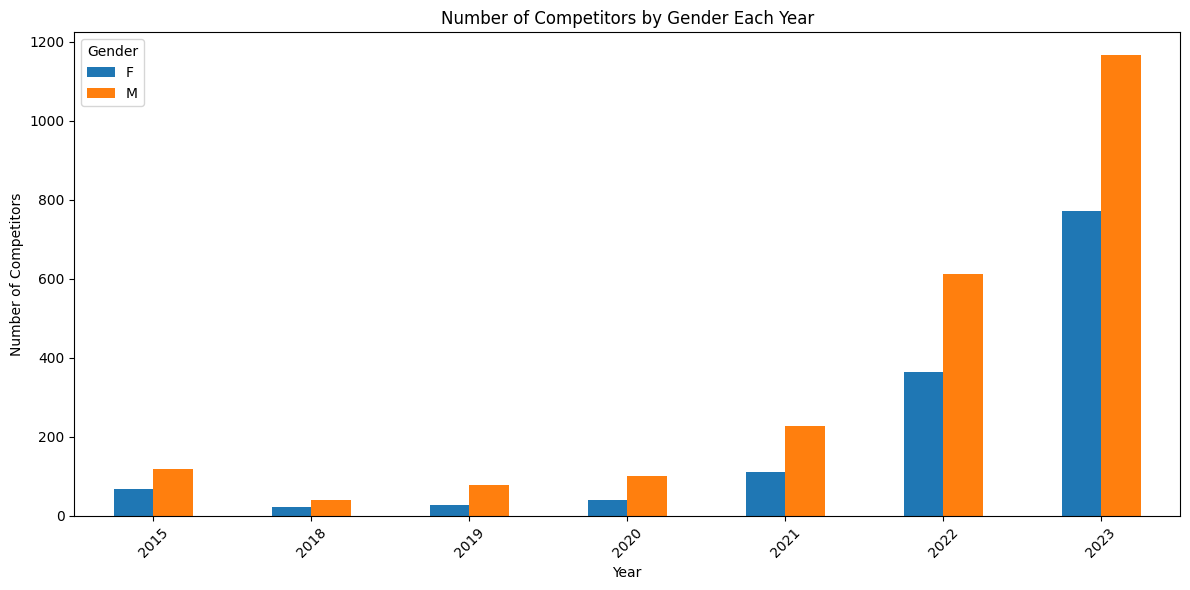

In [228]:
gender_distribution_yearly[['F', 'M']].plot(kind='bar', figsize=(12, 6))
plt.title('Number of Competitors by Gender Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Competitors')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

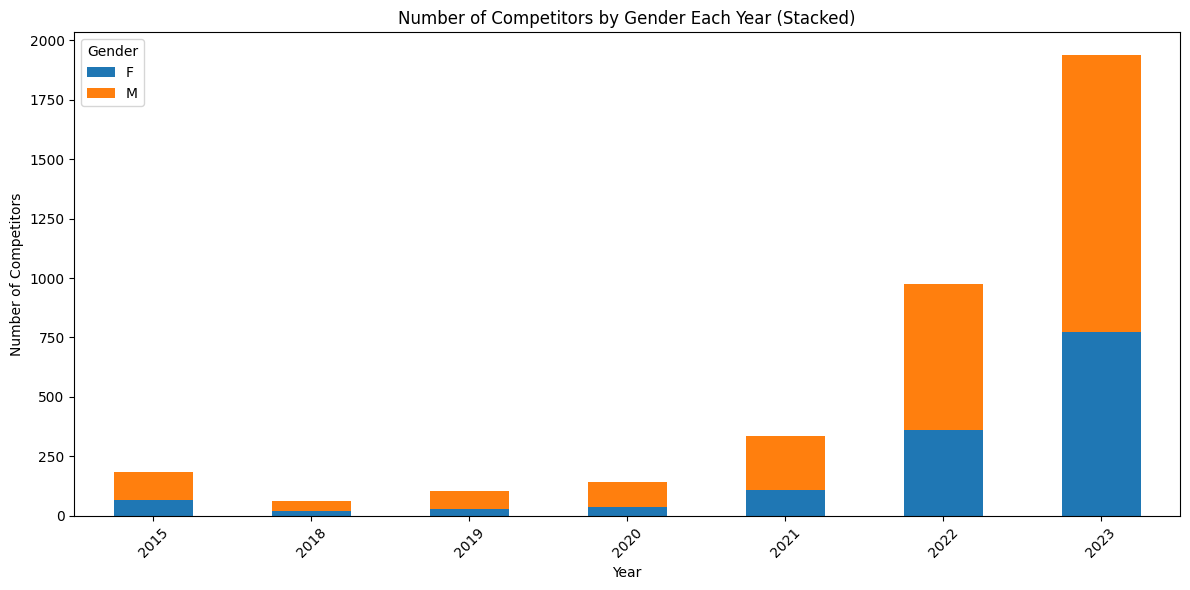

In [229]:
# plotting the gender distribution as a stacked bar chart
gender_distribution_yearly[['F', 'M']].plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Number of Competitors by Gender Each Year (Stacked)')
plt.xlabel('Year')
plt.ylabel('Number of Competitors')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

# Which lifters have the highest totals by weight class?

In [230]:
# Group by 'WeightClassKg', 'Equipment', 'Tested' and find the maximum 'TotalKg'
max_totals = filtered_df.groupby(['WeightClassKg', 'Equipment', 'Tested'])['TotalKg'].max().reset_index()

# merge this back with the original DataFrame to find the corresponding lifter(s)
top_lifters = pd.merge(max_totals, filtered_df, on=['WeightClassKg', 'Equipment', 'Tested', 'TotalKg'], how='left')

# Select only the relevant columns to avoid duplicates, assuming 'Name' is the column for lifter names
_top_lifters = top_lifters[['Name', 'WeightClassKg', 'Equipment', 'Tested', 'TotalKg']]

# print(_top_lifters)

In [231]:
sorted_top_lifters = top_lifters.sort_values(by=['Tested', 'Equipment', 'Sex', 'WeightClassKg'], ascending=[True, True, True, True])
_sorted_top_lifters = sorted_top_lifters[['Name', 'WeightClassKg', 'Equipment', 'Tested', 'TotalKg', 'Date']]
# _sorted_top_lifters

In [232]:
# Initialize an empty dictionary to hold the split DataFrames
dfs = {}

# Iterate over each combination of Gender, Tested, and Equipment
for gender in sorted_top_lifters['Sex'].unique():
    for tested in sorted_top_lifters['Tested'].unique():
        for equipment in sorted_top_lifters['Equipment'].unique():
            # Create a key for the dictionary
            key = f"{gender}_{tested}_{equipment}"
            
            # Filter the DataFrame for the current combination
            df_filtered = sorted_top_lifters[
                (sorted_top_lifters['Sex'] == gender) &
                (sorted_top_lifters['Tested'] == tested) &
                (sorted_top_lifters['Equipment'] == equipment)
                ]
            
            # Only add to dictionary if the filtered DataFrame is not empty
            if not df_filtered.empty:
                dfs[key] = df_filtered


In [233]:
# Male & not tested, equipment=Raw
male_not_tested_raw = dfs['M_False_Raw']

# Male & not tested, equipment=Wraps
male_not_tested_wraps = dfs['M_False_Wraps']

# Male & not tested, equipment=Single-ply
male_not_tested_single_ply = dfs['M_False_Single-ply']

# Male & not tested, equipment=Multi-ply
male_not_tested_multi_ply = dfs['M_False_Multi-ply']

# Female & not tested, equipment=Raw
female_not_tested_raw = dfs['F_False_Raw']

# Female & not tested, equipment=Wraps
female_not_tested_wraps = dfs['F_False_Wraps']

# Female & not tested, equipment=Single-ply
female_not_tested_single_ply = dfs['F_False_Single-ply']

# Female & not tested, equipment=Multi-ply
female_not_tested_multi_ply = dfs['F_False_Multi-ply']

# Male & tested, equipment=Raw
male_tested_raw = dfs['M_True_Raw']

# Female & tested, equipment=Raw
female_tested_raw = dfs['F_True_Raw']

# male untested raw

In [234]:
male_not_tested_raw[['Name', 'WeightClassKg', 'Equipment', 'Tested', 'TotalKg', 'Date', 'MeetName']].drop_duplicates()

,Name,WeightClassKg,Equipment,Tested,TotalKg,Date,MeetName
1,Tristan Stringer,100,Raw,False,780.0,2022-10-02,Strength Quest II
8,Nicholas Vasiliadis,110,Raw,False,847.5,2023-09-30,ZeroW Pro
20,Shaun Mishler,125,Raw,False,847.5,2023-12-10,Strength HQ Christmas Cup Open
27,Theo Maddox,140,Raw,False,962.5,2022-10-02,Strength Quest II
32,Brendan Lewis,140+,Raw,False,875.0,2023-04-01,NSW State Championships
48,Jett Bolton,56,Raw,False,472.5,2023-07-09,Strength Quest III
54,Maninder Singh,60,Raw,False,455.0,2015-09-05,National Titles
58,Vidu Eb,67.5,Raw,False,497.5,2021-03-14,Gold Coast Cup
64,Trevor Yang,75,Raw,False,587.5,2023-09-02,Townsville Cup Open
71,Tyson Schmidt,82.5,Raw,False,700.0,2023-03-25,QLD States


# Male untested wraps

In [235]:
male_not_tested_wraps[['Name', 'WeightClassKg', 'Equipment', 'Tested', 'TotalKg', 'Date', 'MeetName']].drop_duplicates()

,Name,WeightClassKg,Equipment,Tested,TotalKg,Date,MeetName
5,Thomas Hardy,100,Wraps,False,880.0,2023-09-30,ZeroW Pro
13,Kane Vucko,110,Wraps,False,845.0,2023-09-30,ZeroW Pro
24,Anthony Krznar,125,Wraps,False,875.0,2021-07-04,VIC State Titles
30,Edan Mata,140,Wraps,False,915.0,2020-03-23,March Cup
35,Ben Clarke,140+,Wraps,False,875.0,2021-09-12,Strength Quest
62,Sean Kastanas,67.5,Wraps,False,572.5,2023-11-04,End Of Year Send Open
67,Jacob Tapp,75,Wraps,False,652.5,2023-02-05,Hobart Cup
75,Daniel Mahony,82.5,Wraps,False,752.5,2023-09-30,ZeroW Pro
84,Darwin Suteerawanit,90,Wraps,False,800.0,2023-09-30,ZeroW Pro


# Male untested single ply

In [236]:
male_not_tested_single_ply[['Name', 'WeightClassKg', 'Equipment', 'Tested', 'TotalKg', 'Date', 'MeetName']].drop_duplicates().to_string(index=False)

'             Name WeightClassKg  Equipment  Tested  TotalKg       Date                  MeetName\n    David Cutroni           100 Single-ply   False    140.0 2023-11-19 Champions of Geelong Open\n    Lachlan Green           110 Single-ply   False    820.0 2023-12-02    QLD Christmas Cup Open\n    Thomas Lilley           125 Single-ply   False   1012.5 2023-04-01   NSW State Championships\n Shane Atta-Singh          140+ Single-ply   False    280.0 2015-06-13          QLD State Titles\nThomas Birmingham          67.5 Single-ply   False    152.5 2015-06-13          QLD State Titles'

# Male untested mutli-ply

In [237]:
male_not_tested_multi_ply[['Name', 'WeightClassKg', 'Equipment', 'Tested', 'TotalKg', 'Date', 'MeetName']].drop_duplicates()

,Name,WeightClassKg,Equipment,Tested,TotalKg,Date,MeetName
0,Ron Birch,100,Multi-ply,False,162.5,2019-08-11,Open National Championships
7,Isaac Reynaud,110,Multi-ply,False,662.5,2020-02-23,Gold Coast Cup
19,Christian O'Grady,125,Multi-ply,False,535.0,2015-05-09,NSW State Titles
26,Daniel Rudolph,140,Multi-ply,False,860.0,2019-04-28,Open Anzac International


# Female untested raw

In [238]:
female_not_tested_raw[['Name', 'WeightClassKg', 'Equipment', 'Tested', 'TotalKg', 'Date', 'MeetName']].drop_duplicates()

,Name,WeightClassKg,Equipment,Tested,TotalKg,Date,MeetName
15,Debbie Maxwell,110+,Raw,False,405.0,2022-12-03,ZeroW Christmas Cup
37,Zhara Krine,44,Raw,False,220.0,2015-09-05,National Titles
39,Fion Wong,48,Raw,False,255.0,2021-09-12,Strength Quest
43,Dori Qu,52,Raw,False,345.0,2023-03-26,VIC States
86,Tea Pascoe,90+,Raw,False,360.0,2015-09-05,National Titles


# female untested wraps

In [239]:
female_not_tested_wraps[['Name', 'WeightClassKg', 'Equipment', 'Tested', 'TotalKg', 'Date', 'MeetName']].drop_duplicates()

,Name,WeightClassKg,Equipment,Tested,TotalKg,Date,MeetName
17,Ruby Herbert,110+,Wraps,False,380.0,2022-02-13,Victoria States
45,Onica Mhaka,52,Wraps,False,337.5,2023-09-30,ZeroW Pro
51,Charlotte Wallace,56,Wraps,False,397.5,2022-06-17,Open Nationals
56,Jen Smith #1,60,Wraps,False,545.0,2020-03-23,March Cup
88,Lydia Hantke,90+,Wraps,False,552.5,2020-12-05,Christmas Classic


# Female untested single-ply

In [240]:
female_not_tested_single_ply[['Name', 'WeightClassKg', 'Equipment', 'Tested', 'TotalKg', 'Date', 'MeetName']].drop_duplicates()

,Name,WeightClassKg,Equipment,Tested,TotalKg,Date,MeetName
80,Nicky Burns,90,Single-ply,False,90.0,2022-10-02,Strength Quest II


# Female untested multi-ply

In [241]:
female_not_tested_multi_ply[['Name', 'WeightClassKg', 'Equipment', 'Tested', 'TotalKg', 'Date', 'MeetName']].drop_duplicates()

,Name,WeightClassKg,Equipment,Tested,TotalKg,Date,MeetName
47,Michelina Weatherall,56,Multi-ply,False,180.0,2018-08-04,Nationals
70,Yvonne Odell,82.5,Multi-ply,False,142.5,2023-11-19,Champions of Geelong Open
77,Jessica Xuereb,90,Multi-ply,False,300.0,2023-11-19,Champions of Geelong Open


# Male tested raw

In [242]:
male_tested_raw[['Name', 'WeightClassKg', 'Equipment', 'Tested', 'TotalKg', 'Date', 'MeetName']].drop_duplicates()

,Name,WeightClassKg,Equipment,Tested,TotalKg,Date,MeetName
2,Chris Thomas #1,100,Raw,True,782.5,2023-12-02,QLD Christmas Cup Tested
9,Nicholai Cushing,110,Raw,True,800.0,2023-06-16,Tested Nationals
21,Bronco Deiranauw,125,Raw,True,805.0,2023-12-10,StrengthHQ Christmas Cup Tested
29,Tai Seuga,140,Raw,True,830.0,2023-03-26,WA Drug Tested Raw State Powerlifting Champion...
33,Jordan Dare,140+,Raw,True,835.0,2023-12-09,Ultimatum
49,Burt-Raynold Samson,56,Raw,True,430.0,2023-06-16,Tested Nationals
55,Lemuel Lobhoy,60,Raw,True,480.0,2022-03-12,QLD State Championships
59,Cuong Huynh,67.5,Raw,True,560.0,2022-09-11,Spring Classic
65,Deryck Butcher,75,Raw,True,650.0,2022-04-03,WA State Powerlifting Championships
72,Regan Payne,82.5,Raw,True,700.0,2023-09-02,Townsville Cup Drug Tested


# Female tested raw

In [243]:
female_tested_raw[['Name', 'WeightClassKg', 'Equipment', 'Tested', 'TotalKg', 'Date', 'MeetName']].drop_duplicates()

,Name,WeightClassKg,Equipment,Tested,TotalKg,Date,MeetName
16,Latanya Parker,110+,Raw,True,500.0,2023-12-02,QLD Christmas Cup Tested
38,Kelly Plummer,44,Raw,True,235.0,2022-09-11,Spring Classic
40,Dori Qu,48,Raw,True,320.0,2022-08-27,Ethos Cup
44,Dori Qu,52,Raw,True,351.5,2023-06-16,Tested Nationals
87,Kerry Lee,90+,Raw,True,422.5,2021-05-30,WA Drug Tested State Championships
